In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.layers import Dense, GRU, Embedding

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df1 = pd.read_csv('fake_job_postings1.csv')

In [3]:
df1.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df1.shape

(17880, 18)

In [5]:
df=df1[['description','requirements','fraudulent']]
df.head()

,description,requirements,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0
1,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0
2,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0
3,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0


In [6]:
###Drop Nan Values
df=df.dropna()

In [7]:
df.shape

(15184, 3)

In [8]:
## Get the Independent Features

X=df.drop('fraudulent',axis=1)
X.shape
X.sample(5)

,description,requirements
14954,We’re looking for a talented #URL_01a736d89d2f...,Expert C# coding skillsFront-end application d...
13705,The Driver I position will be based in our Wes...,Qualifications:Must have 6 months customer ser...
10789,The Technical Site Representative will be base...,Qualifications:Minimum of 6 months customer se...
14047,The Customer Service Associate will be based i...,Required qualifications:Minimum of 6 months cu...
2377,"About Us:We are Ridogulous Labs, a hardware/so...","About You:You eat, sleep and breathe social me..."


In [9]:
## Get the Dependent features
y=df['fraudulent']
y.shape

(15184,)

In [10]:
y.sample(5)

9282     0
9384     0
17143    1
8451     0
10103    0
Name: fraudulent, dtype: int64

In [11]:
y.value_counts()

fraudulent
0    14472
1      712
Name: count, dtype: int64

In [12]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [13]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [14]:
voc_size=5000

>  ****One-hot Representation****

In [15]:
message = X.copy()
message.head()

,description,requirements
0,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...
1,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...
2,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...
3,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi..."
4,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...


In [16]:
message['description'][1]
# message['description'][1]

"Organised - Focused - Vibrant - Awesome!Do you have a passion for customer service? Slick typing skills? Maybe Account Management? ...And think administration is cooler than a polar bear on a jetski? Then we need to hear you!\xa0We are the Cloud Video Production Service and opperating on a glodal level. Yeah, it's pretty cool. Serious about\xa0delivering a world class product and excellent customer service.Our rapidly expanding business is looking for a talented Project Manager to manage the successful delivery of video projects, manage client communications and drive the production process. Work with some of the coolest brands on the planet and learn from a global team that are representing NZ is a huge way!We are entering the next growth stage of our business and growing quickly internationally. \xa0Therefore, the position is bursting with opportunity for the right person entering the business at the right time.\xa090 Seconds, the worlds Cloud Video Production Service -\xa0http://90

In [17]:
message.reset_index(inplace=True)

In [18]:
import nltk
import re
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anupam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['description'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [21]:
corpus[1]

'organis focus vibrant awesom passion custom servic slick type skill mayb account manag think administr cooler polar bear jetski need hear cloud video product servic opper glodal level yeah pretti cool seriou deliv world class product excel custom servic rapidli expand busi look talent project manag manag success deliveri video project manag client commun drive product process work coolest brand planet learn global team repres nz huge way enter next growth stage busi grow quickli intern therefor posit burst opportun right person enter busi right time second world cloud video product servic http url fbe afac cd c f b eef e e f ca dd second world cloud video product servic enabl brand agenc get high qualiti onlin video content shot produc anywher world fast afford manag seamlessli cloud purchas publish second remov hassl cost risk speed issu work regular video product compani manag everi aspect video project beauti onlin experi grow network rate video profession countri dedic product suc

In [22]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[1]

[3481,
 1990,
 292,
 4609,
 3513,
 396,
 4967,
 1800,
 4359,
 4739,
 1680,
 369,
 585,
 3761,
 4105,
 1802,
 1512,
 855,
 1280,
 1430,
 1814,
 2227,
 716,
 438,
 4967,
 3991,
 3686,
 4425,
 511,
 2091,
 3502,
 2734,
 3798,
 1505,
 1982,
 438,
 4305,
 396,
 4967,
 1502,
 3512,
 1116,
 4994,
 3,
 4984,
 585,
 585,
 696,
 1080,
 716,
 4984,
 585,
 1534,
 4140,
 195,
 438,
 3439,
 1869,
 3810,
 4470,
 3069,
 2329,
 3224,
 438,
 3983,
 2235,
 2952,
 2579,
 3389,
 1136,
 278,
 4743,
 1116,
 1965,
 1804,
 3847,
 3164,
 4373,
 1866,
 2074,
 2781,
 3208,
 3389,
 1116,
 2781,
 3177,
 1139,
 1505,
 2227,
 716,
 438,
 4967,
 3212,
 559,
 925,
 2786,
 63,
 3693,
 880,
 2030,
 2008,
 1100,
 1100,
 880,
 2623,
 2526,
 1139,
 1505,
 2227,
 716,
 438,
 4967,
 2537,
 4470,
 3520,
 1304,
 1809,
 2346,
 568,
 716,
 4071,
 3777,
 1372,
 1761,
 1505,
 1461,
 1599,
 585,
 4211,
 2227,
 4844,
 2986,
 1139,
 3675,
 3792,
 930,
 4500,
 1569,
 1905,
 1869,
 1265,
 716,
 438,
 3866,
 585,
 4117,
 1968,
 716,
 498

****Embedding Representation****

In [23]:
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[4823 4071  585 ... 4048 3371 4098]
 [ 696 3022 1734 ... 2447 1788 1220]
 [   0    0    0 ... 1527 1316 1547]
 ...
 [3416 4816 1993 ... 2817   56  466]
 [3041  695 2789 ...  218 3847 4984]
 [4370  873 4048 ... 3483 1256 1661]]


In [24]:
embedded_docs[0]

array([4823, 4071,  585, 4513,  625, 3080, 2248,  679, 3512, 2204, 2824,
       2824, 3512, 1865, 2329, 2992, 3512, 1489, 3512, 4360, 2871, 4211,
       2715, 1993, 3938, 4105, 1869, 2143, 3808, 3317, 2141, 4913, 3017,
       3399, 1880, 4559, 2102, 4048, 3371, 4098])

In [25]:
## Creating model
embedding_vector_features=50
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100))) ##Just add bidirectional!!, except it would just behave as normal LSTM Model
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 50)            250000    
                                                                 
 bidirectional (Bidirection  (None, 200)               120800    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 371001 (1.42 MB)
Trainable params: 371001 (1.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [26]:
len(embedded_docs),y.shape

(15184, (15184,))

In [27]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [28]:
X_final[0]

array([4823, 4071,  585, 4513,  625, 3080, 2248,  679, 3512, 2204, 2824,
       2824, 3512, 1865, 2329, 2992, 3512, 1489, 3512, 4360, 2871, 4211,
       2715, 1993, 3938, 4105, 1869, 2143, 3808, 3317, 2141, 4913, 3017,
       3399, 1880, 4559, 2102, 4048, 3371, 4098])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=32)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=32)

In [30]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=12,batch_size=64)

Epoch 1/12


178/178 [==============================] - 26s 103ms/step - loss: 0.1898 - accuracy: 0.9566 - val_loss: 0.1531 - val_accuracy: 0.9602
Epoch 2/12
178/178 [==============================] - 14s 81ms/step - loss: 0.0847 - accuracy: 0.9754 - val_loss: 0.1342 - val_accuracy: 0.9647
Epoch 3/12
178/178 [==============================] - 16s 89ms/step - loss: 0.0597 - accuracy: 0.9832 - val_loss: 0.1323 - val_accuracy: 0.9650
Epoch 4/12
178/178 [==============================] - 15s 84ms/step - loss: 0.0405 - accuracy: 0.9893 - val_loss: 0.1354 - val_accuracy: 0.9687
Epoch 5/12
178/178 [==============================] - 21s 116ms/step - loss: 0.0300 - accuracy: 0.9924 - val_loss: 0.1412 - val_accuracy: 0.9652
Epoch 6/12
178/178 [==============================] - 21s 119ms/step - loss: 0.0251 - accuracy: 0.9933 - val_loss: 0.1605 - val_accuracy: 0.9652
Epoch 7/12
178/178 [==============================] - 18s 101ms/step - loss: 0.0181 - accuracy: 0.9951 - val_loss: 0.1956 - val_acc

**Model Performance and Accuracy**

In [31]:
model1.evaluate(X_test, y_test)

119/119 [==============================] - 3s 23ms/step - loss: 0.2265 - accuracy: 0.9592


[0.2264743149280548, 0.9591675400733948]

In [32]:
#Do predicton on test set
y_pred=model1.predict(X_test)

119/119 [==============================] - 5s 22ms/step


In [33]:
print(y_pred)

print(y_test)

[[6.8194158e-03]
 [8.8953802e-06]
 [1.0521443e-05]
 ...
 [2.4271091e-03]
 [3.9099189e-04]
 [2.9470472e-04]]
[0 0 0 ... 0 0 0]


In [34]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, classification_report, accuracy_score
import seaborn as sns

In [35]:
preds_y = [1 if x >=0.5 else 0 for x in y_pred]
print("Accuracy  {:.3} %".format(accuracy_score(y_test, preds_y)*100))
print("Recall Score  {:.3} %".format(recall_score(y_test, preds_y)*100))
print("Precision Score  {:.3} %".format(precision_score(y_test, preds_y)*100))
print("F1 Score  {:.3} %".format(f1_score(y_test, preds_y)*100))

Accuracy  95.9 %
Recall Score  58.1 %
Precision Score  62.8 %
F1 Score  60.4 %


In [36]:
print(classification_report(y_test, preds_y))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3593
           1       0.63      0.58      0.60       203

    accuracy                           0.96      3796
   macro avg       0.80      0.78      0.79      3796
weighted avg       0.96      0.96      0.96      3796



<Axes: >

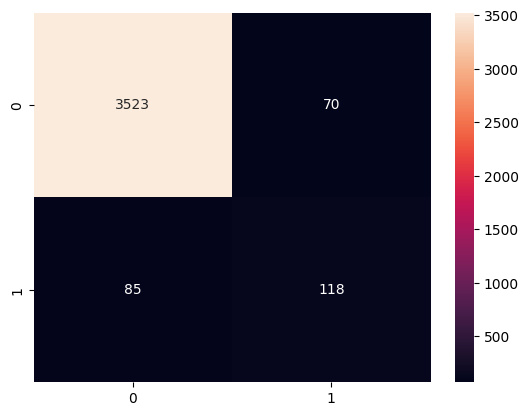

In [37]:
cm = confusion_matrix(y_test, preds_y)

sns.heatmap(cm, annot=True, fmt="")

In [38]:
#SVM, NB

## GRU

In [39]:
model2 = Sequential()
model2.add(Embedding(input_dim=voc_size,
output_dim=embedding_vector_features,
input_length=sent_length))

In [40]:
## Creating model
embedding_vector_features=50
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model2.add(GRU(units=16, return_sequences=True))
model2.add(GRU(units=8, return_sequences=True))
model2.add(GRU(units=4))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 50)            250000    
                                                                 
 bidirectional (Bidirection  (None, 200)               120800    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 371001 (1.42 MB)
Trainable params: 371001 (1.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [41]:
model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
178/178 [==============================] - 38s 117ms/step - loss: 0.3018 - accuracy: 0.9519 - val_loss: 0.2227 - val_accuracy: 0.9465
Epoch 2/5
178/178 [==============================] - 18s 103ms/step - loss: 0.1935 - accuracy: 0.9553 - val_loss: 0.2103 - val_accuracy: 0.9465
Epoch 3/5
178/178 [==============================] - 18s 102ms/step - loss: 0.1769 - accuracy: 0.9577 - val_loss: 0.1874 - val_accuracy: 0.9531
Epoch 4/5
178/178 [==============================] - 19s 108ms/step - loss: 0.1440 - accuracy: 0.9668 - val_loss: 0.1657 - val_accuracy: 0.9589
Epoch 5/5
178/178 [==============================] - 19s 106ms/step - loss: 0.1145 - accuracy: 0.9735 - val_loss: 0.1573 - val_accuracy: 0.9610


In [42]:
model2.evaluate(X_test, y_test)

119/119 [==============================] - 3s 27ms/step - loss: 0.1573 - accuracy: 0.9610


[0.15727968513965607, 0.9610115885734558]

In [43]:
#Do predicton on test set
y_pred=model2.predict(X_test)

119/119 [==============================] - 6s 24ms/step


In [44]:
print(y_pred)

print(y_test)

[[0.03055992]
 [0.03295703]
 [0.02983019]
 ...
 [0.03153487]
 [0.18087207]
 [0.02986868]]
[0 0 0 ... 0 0 0]


In [45]:
preds_y = [1 if x >=0.5 else 0 for x in y_pred]
print("Accuracy  {:.3} %".format(accuracy_score(y_test, preds_y)*100))
print("Recall Score  {:.3} %".format(recall_score(y_test, preds_y)*100))
print("Precision Score  {:.3} %".format(precision_score(y_test, preds_y)*100))
print("F1 Score  {:.3} %".format(f1_score(y_test, preds_y)*100))

Accuracy  96.1 %
Recall Score  31.5 %
Precision Score  87.7 %
F1 Score  46.4 %


In [46]:
print(classification_report(y_test, preds_y))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3593
           1       0.88      0.32      0.46       203

    accuracy                           0.96      3796
   macro avg       0.92      0.66      0.72      3796
weighted avg       0.96      0.96      0.95      3796



In [50]:
#pip install joblib
from joblib import dump

# Assuming 'model' is your trained machine learning model
model_path = 'model1.pkl'
dump(model1, 'C:/Users/Anupam/Desktop/model1.pkl')


['C:/Users/Anupam/Desktop/model1.pkl']

In [51]:
from joblib import dump

# Assuming 'model' is your trained machine learning model
model_path = 'model2.pkl'
dump(model1, 'C:/Users/Anupam/Desktop/model2.pkl')


['C:/Users/Anupam/Desktop/model2.pkl']

In [52]:
from joblib import dump

# Assuming 'model' is your trained machine learning model
model_path = 'model3.pkl'
dump(model1, 'C:/Users/Anupam/Desktop/model3.pkl')


['C:/Users/Anupam/Desktop/model3.pkl']